In [7]:
# GET DATA

import os
from glob import glob
import pandas as pd

# import data
def create_df(path):
    count = 1
    for files in path[0]:
       print(count)
       id = path[1] + str(count)
       print(files)
       if count == 1:
          df1 = pd.read_excel(files)
          df1['id'] = id
       else:    
          df2 = pd.read_excel(files)
          df2['id'] = id
          df1 = df1.append(df2, ignore_index=True)
       count = count + 1
    return df1

# select number of trials to import
n = 1
falls = [glob("../IMU Dataset/sub*/Falls/*xlsx")[0:n], 'F']
near_falls = [glob("../IMU Dataset/sub*/Near_Falls/*xlsx")[0:n], 'NF']
adls = [glob("../IMU Dataset/sub*/ADLs/*xlsx")[0:n], 'A']

# # import all trials
# falls = [glob("../IMU Dataset/sub*/Falls/*xlsx")[:], 'F']
# near_falls = [glob("../IMU Dataset/sub*/Near_Falls/*xlsx")[:], 'NF']
# adls = [glob("../IMU Dataset/sub*/ADLs/*xlsx")[:], 'A']

df_falls = create_df(falls)
df_near_falls = create_df(near_falls)
df_adls = create_df(adls)

# create labels
df_falls['label'] = 1
df_near_falls['label'] = 0
df_adls['label'] = 0
df_non_falls = df_near_falls.append(df_adls, ignore_index=True)

# aggregate data
df_data = df_falls.append(df_non_falls, ignore_index=True)
df_data = df_data.sample(frac=1).reset_index(drop=True)


1
../IMU Dataset/sub10/Falls/VXM_ITRS_trial4.xlsx
1
../IMU Dataset/sub10/Near_Falls/VXM_HB_trial1.xlsx
1
../IMU Dataset/sub10/ADLs/VXM_SQ_trial2.xlsx


In [ ]:
print(df_data)

In [2]:
'''
Exploratory Data Analysis (EDA):
1) description and table
2) sample graphs
3) acf and pacf graphs
4) correlation between variables
'''

'\nExploratory Data Analysis (EDA):\n1) description and table\n2) sample graphs\n3) acf and pacf graphs\n4) correlation between variables\n'

In [5]:
# (1) Description and table (import all data)

import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


falls_description = df_falls.describe()
falls_description['metrics'] = falls_description.index
falls_metrics = falls_description['metrics'].to_numpy()
falls_cols = falls_description.columns.values
falls_cols[0] = 'metrics'
falls_values = falls_description[falls_cols][:-1].to_numpy().T

falls_headers = np.concatenate([['metric'], falls_description.columns.values])

n = 10

trace = go.Table(
    header=dict(values=list(falls_headers[:n+1]),
                fill = dict(color='#C2D4FF'),
                align = ['left'] * 5),
    cells=dict(values=falls_values[:n+1, :],
               fill = dict(color='#F5F8FF'),
               align = ['left'] * 5))

falls_layout = dict(
    title='Fall Data Description',
)

falls = dict(data=[trace], layout=falls_layout)
plot(falls)


data_description = df_data.describe()
data_description['metrics'] = data_description.index
data_metrics = data_description['metrics'].to_numpy()
data_cols = data_description.columns.values
data_cols[0] = 'metrics'
data_values = data_description[data_cols][:-1].to_numpy().T

data_headers = np.concatenate([['metric'], data_description.columns.values])

n = 10

trace = go.Table(
    header=dict(values=list(data_headers[:n+1]),
                fill = dict(color='#C2D4FF'),
                align = ['left'] * 5),
    cells=dict(values=data_values[:n+1, :],
               fill = dict(color='#F5F8FF'),
               align = ['left'] * 5))

data_layout = dict(
    title='Non-Fall Data Description',
)

data = dict(data=[trace], layout=data_layout)
plot(data)

'file:///Users/Eugene/Studies/SFU/CMPT733/Project/EDA/fall-prediction-and-detection_v1/temp-plot.html'

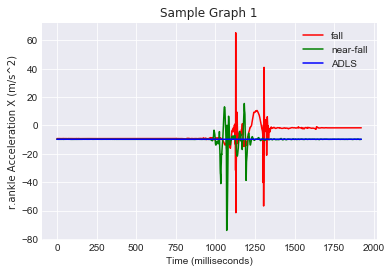

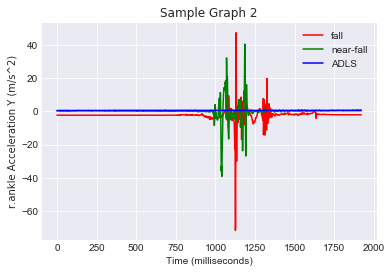

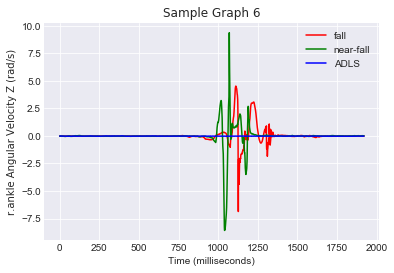

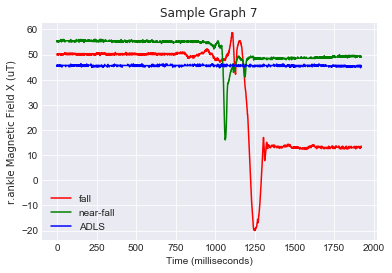

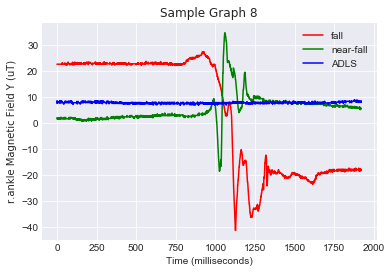

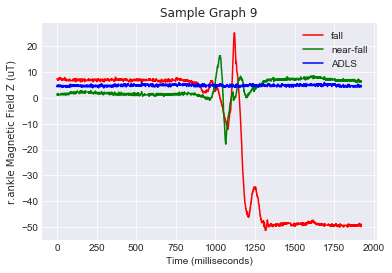

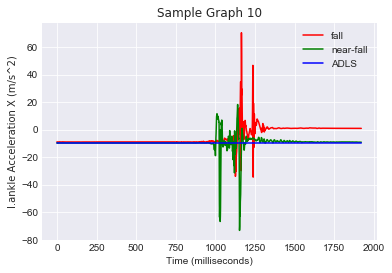

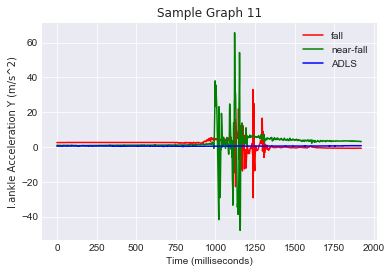

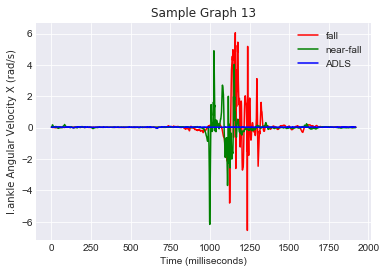

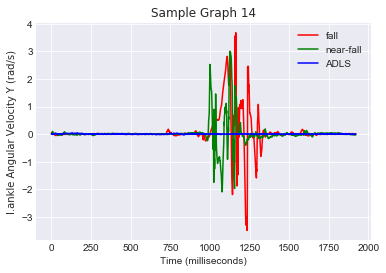

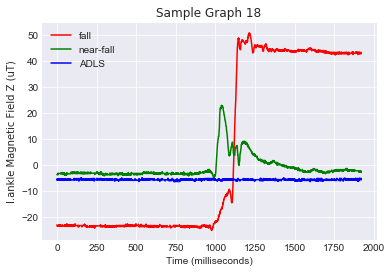

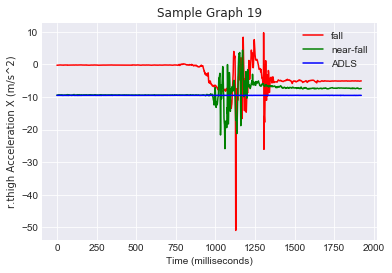

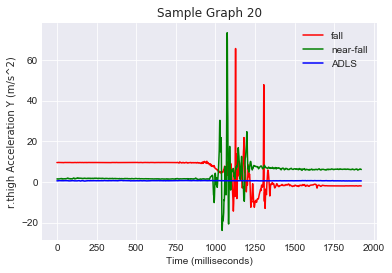

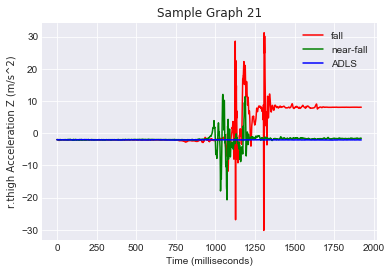

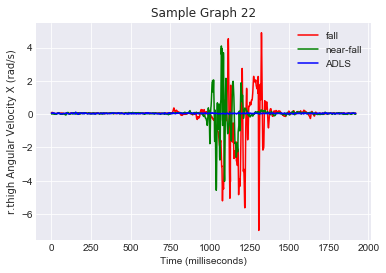

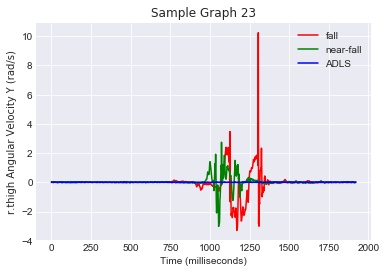

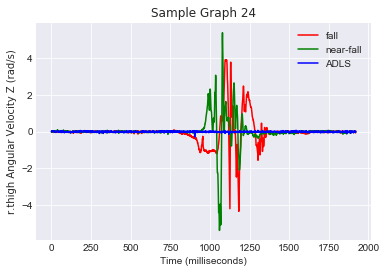

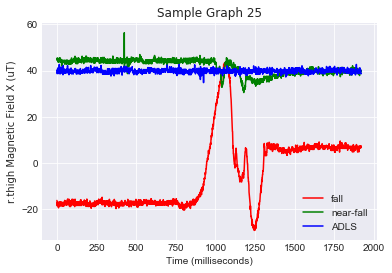

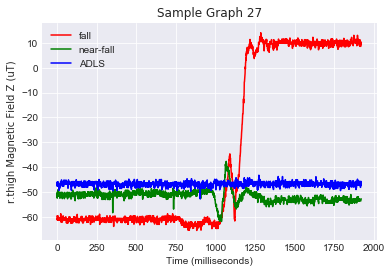

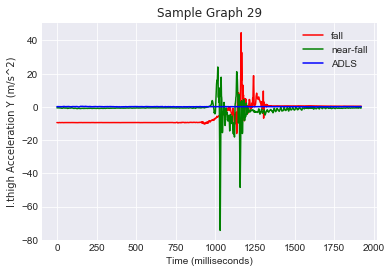

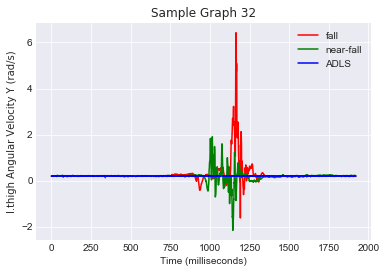

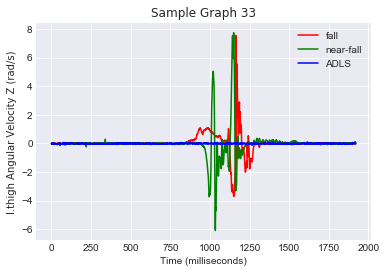

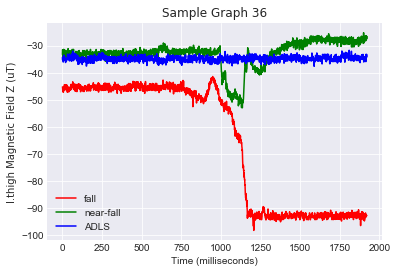

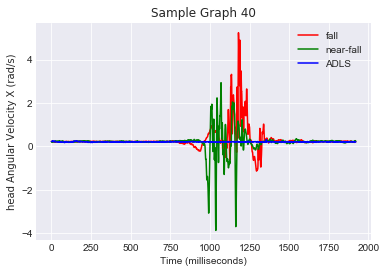

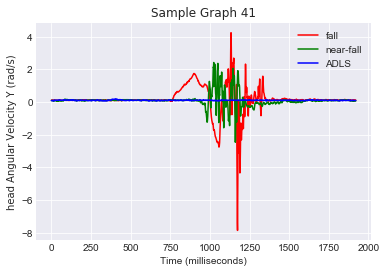

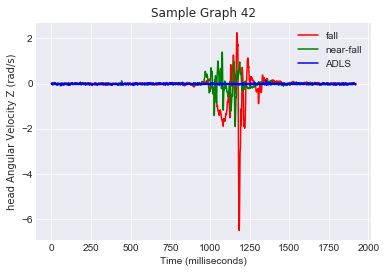

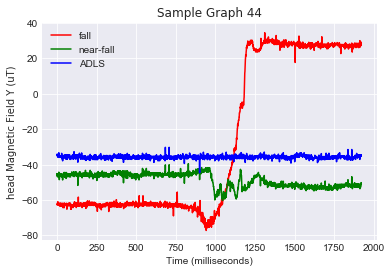

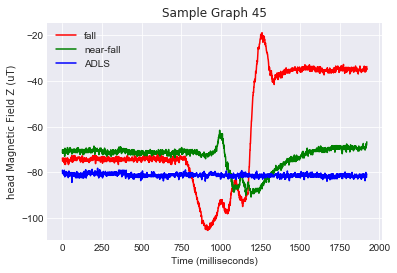

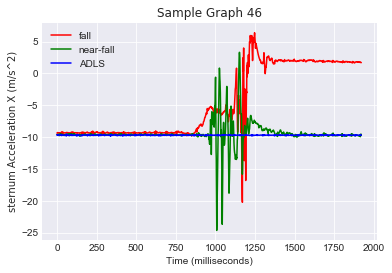

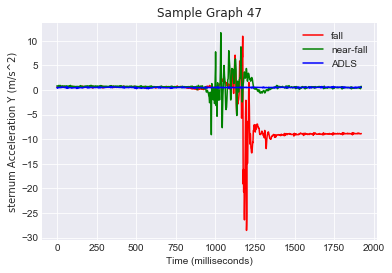

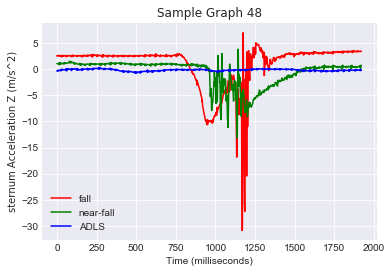

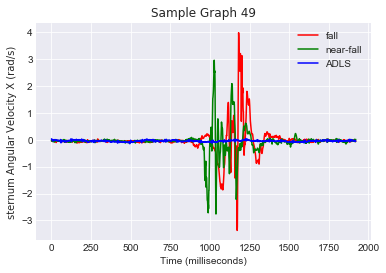

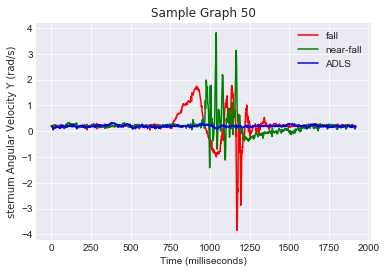

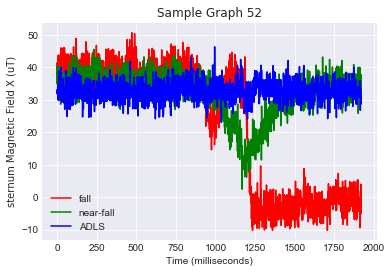

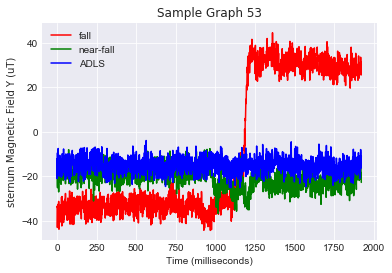

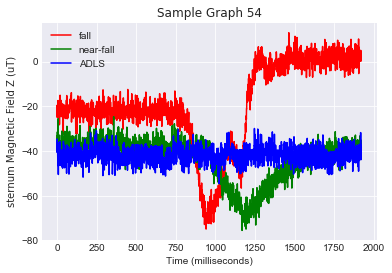

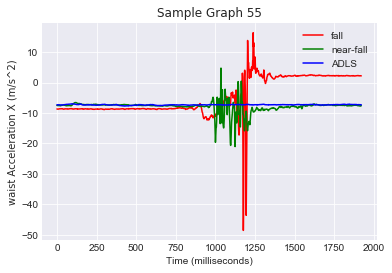

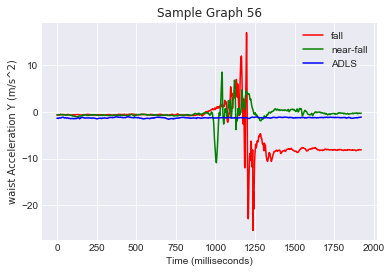

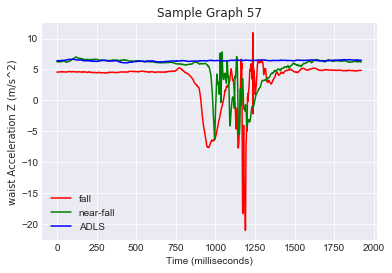

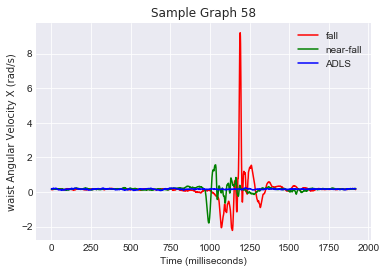

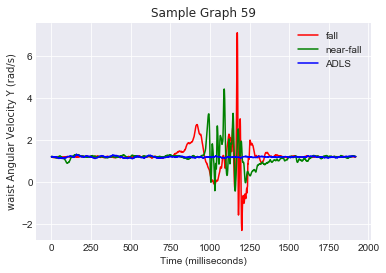

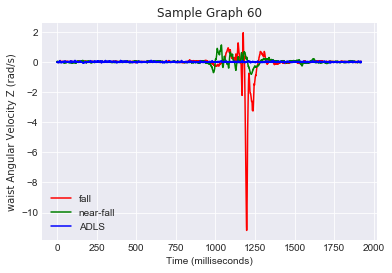

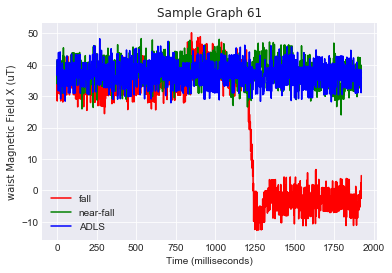

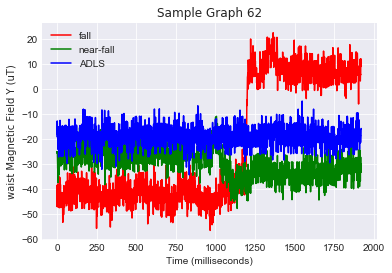

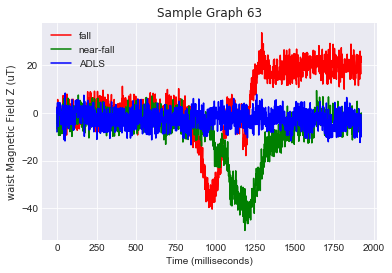

In [43]:
# (2a) Sample graphs (import only 1 trial)

%matplotlib inline
import matplotlib.pyplot as plt

fall = df_falls.loc[df_falls.id == 'F1']
near_fall = df_near_falls.loc[df_near_falls.id == 'NF1']
adls = df_adls.loc[df_adls.id == 'A1']

num_fields = len(df_falls.columns.values)-2

title_font = {'family' : 'normal',
        'size'   : 12}

font = {'family' : 'normal',
        'size'   : 10}
i = 1
while i < num_fields:

    y_label_fall = fall.columns.values[i]
    y_fall = fall.to_numpy()[:, i:i+1].transpose()[0]

    y_label_near_fall = near_fall.columns.values[i]
    y_near_fall = near_fall.to_numpy()[:, i:i+1].transpose()[0]

    y_label_adls = adls.columns.values[i]
    y_adls = adls.to_numpy()[:, i:i+1].transpose()[0]

    plt.plot(y_fall, 'r', label='fall')
    plt.plot(y_near_fall, 'g', label='near-fall')
    plt.plot(y_adls, 'b', label='ADLS')
    plt.ylabel(y_label_fall, **font)
    plt.xlabel('Time (milliseconds)')
    plt.title('Sample Graph ' + str(i), **title_font)
    plt.grid(True)
    plt.legend()
    plt.style.use('seaborn-darkgrid')
    plt.show()
    
    i+=1

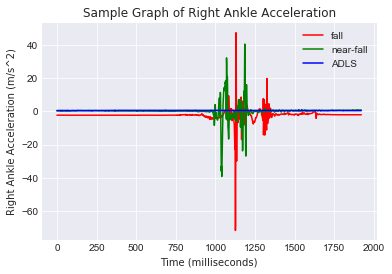

In [45]:
# (2b) Sample graph for poster (import only 1 trial)

%matplotlib inline
import matplotlib.pyplot as plt

fall = df_falls.loc[df_falls.id == 'F1']
near_fall = df_near_falls.loc[df_near_falls.id == 'NF1']
adls = df_adls.loc[df_adls.id == 'A1']

title_font = {'family' : 'normal',
        'size'   : 12}

font = {'family' : 'normal',
        'size'   : 10}
i = 2

y_label_fall = fall.columns.values[i]
y_fall = fall.to_numpy()[:, i:i+1].transpose()[0]

y_label_near_fall = near_fall.columns.values[i]
y_near_fall = near_fall.to_numpy()[:, i:i+1].transpose()[0]

y_label_adls = adls.columns.values[i]
y_adls = adls.to_numpy()[:, i:i+1].transpose()[0]

plt.plot(y_fall, 'r', label='fall')
plt.plot(y_near_fall, 'g', label='near-fall')
plt.plot(y_adls, 'b', label='ADLS')
plt.ylabel('Right Ankle Acceleration (m/s^2)', **font)
plt.xlabel('Time (milliseconds)', **font)
plt.title('Sample Graph of Right Ankle Acceleration', **title_font)
plt.grid(True)
plt.legend()
plt.style.use('seaborn-darkgrid')
plt.savefig('sample.png')
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


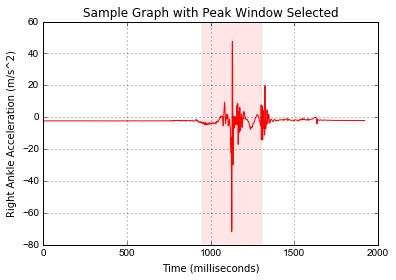

In [55]:
# (2c) Sample graph for poster with window (import only 1 trial)

%matplotlib inline
import matplotlib.pyplot as plt

fall = df_falls.loc[df_falls.id == 'F1']
near_fall = df_near_falls.loc[df_near_falls.id == 'NF1']
adls = df_adls.loc[df_adls.id == 'A1']

title_font = {'family' : 'normal',
        'size'   : 12}

font = {'family' : 'normal',
        'size'   : 10}
i = 2

y_label_fall = fall.columns.values[i]
y_fall = fall.to_numpy()[:, i:i+1].transpose()[0]

y_label_near_fall = near_fall.columns.values[i]
y_near_fall = near_fall.to_numpy()[:, i:i+1].transpose()[0]

y_label_adls = adls.columns.values[i]
y_adls = adls.to_numpy()[:, i:i+1].transpose()[0]

plt.plot(y_fall, 'r', label='fall')
plt.ylabel('Right Ankle Acceleration (m/s^2)', **font)
plt.xlabel('Time (milliseconds)', **font)
plt.title('Sample Graph with Peak Window Selected', **title_font)
plt.grid(True)
# plt.legend()
plt.style.use('seaborn-darkgrid')
plt.axvspan(950, 1300, alpha=0.1, color='red')
plt.savefig('window.png')
plt.show(

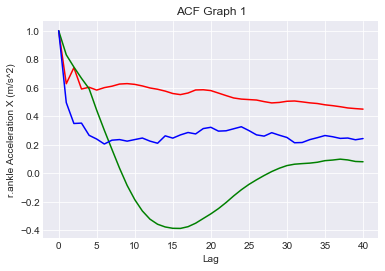

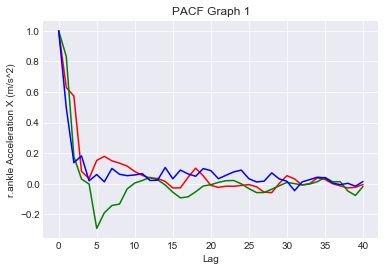

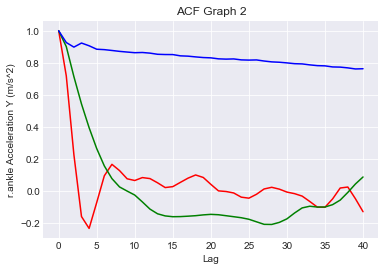

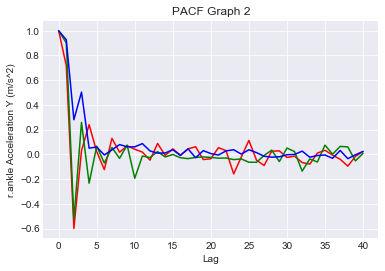

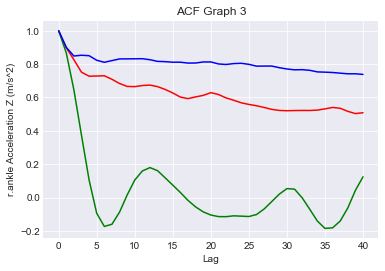

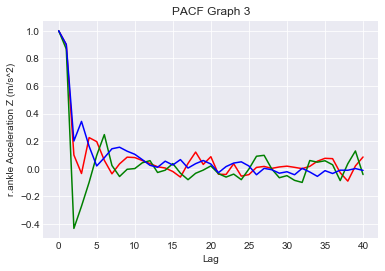

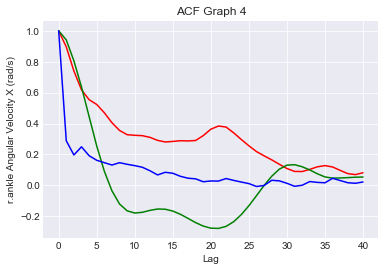

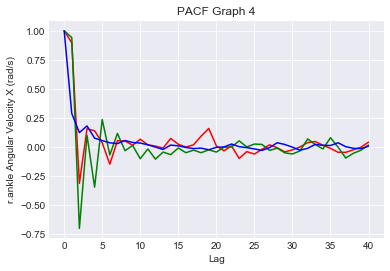

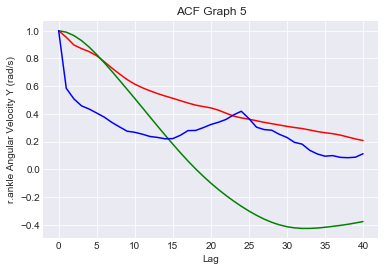

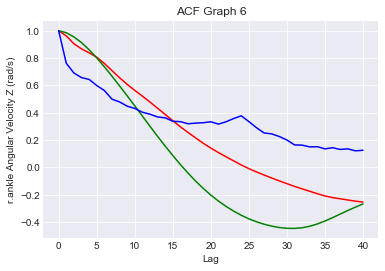

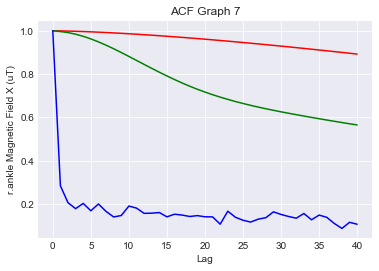

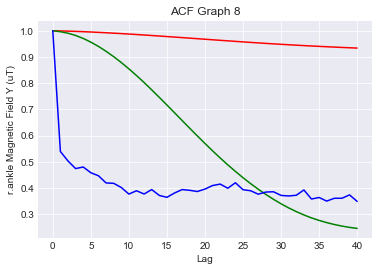

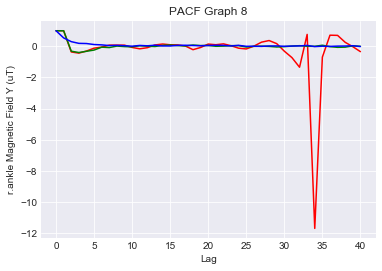

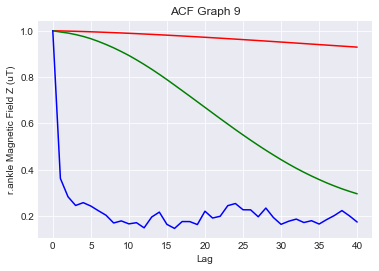

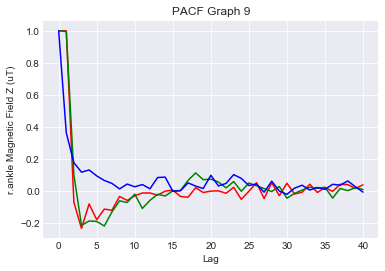

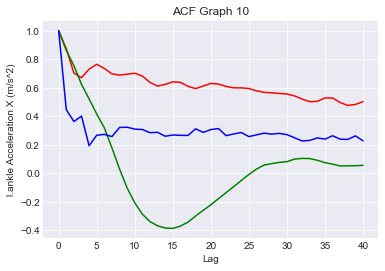

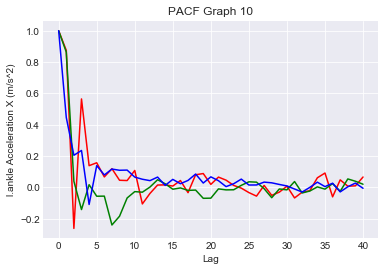

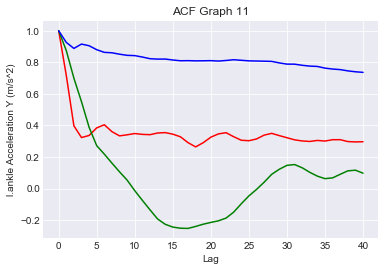

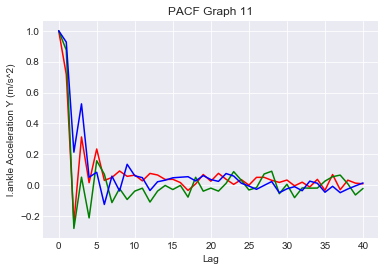

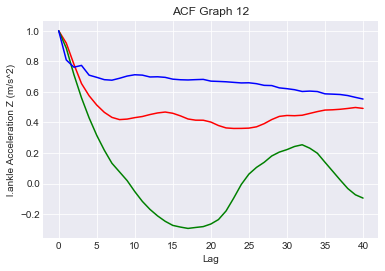

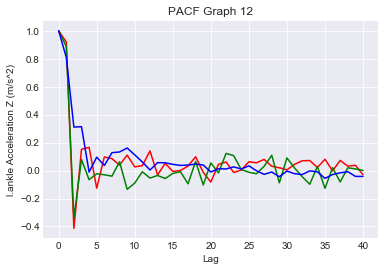

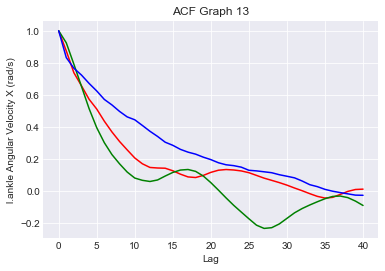

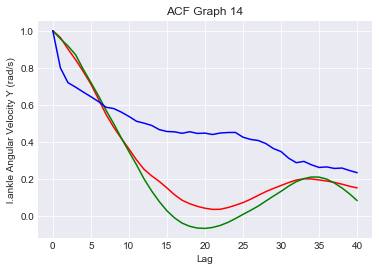

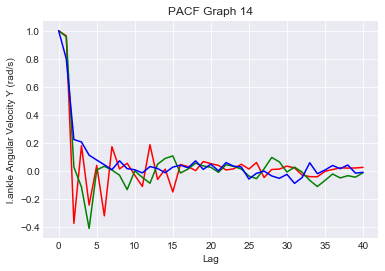

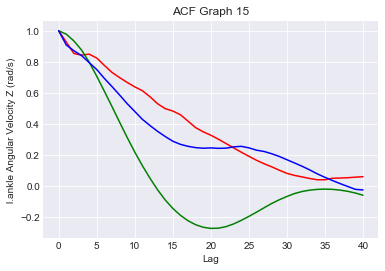

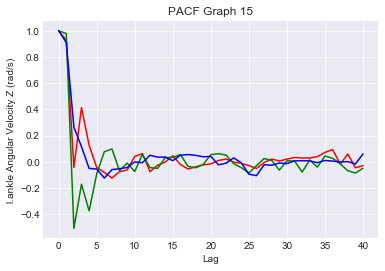

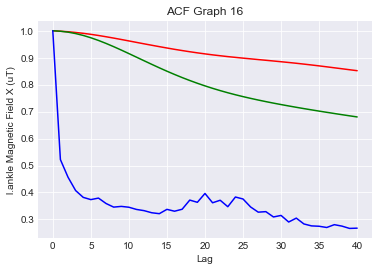

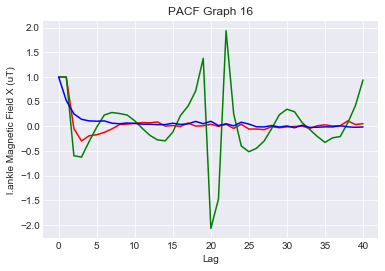

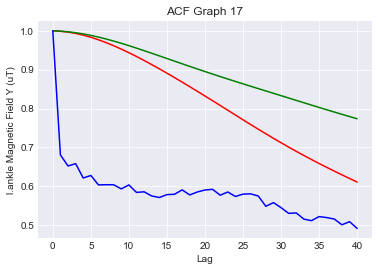

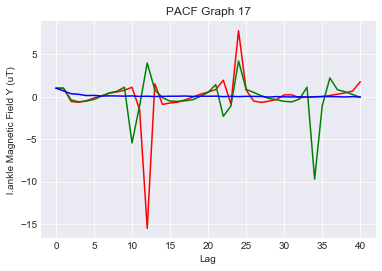

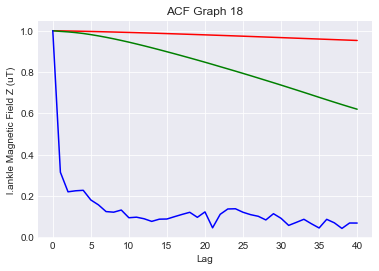

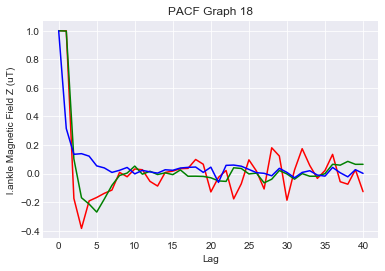

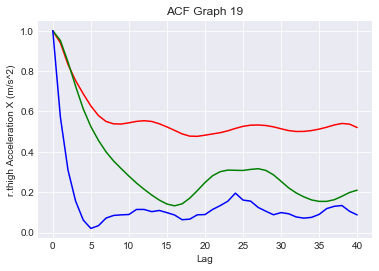

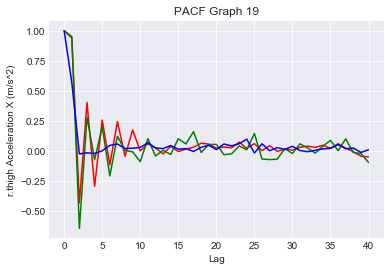

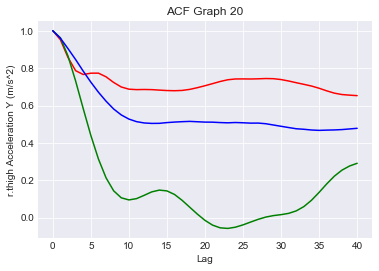

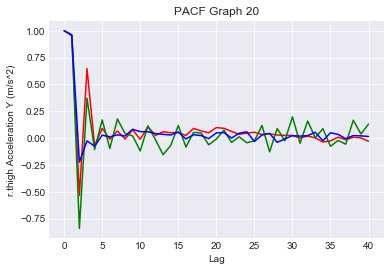

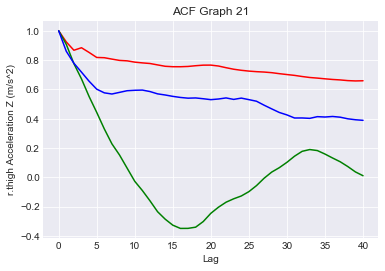

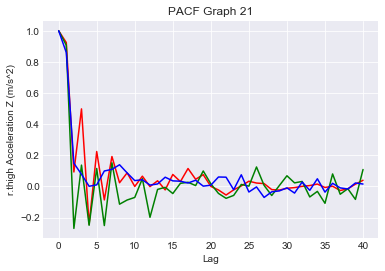

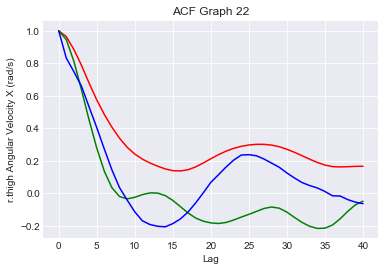

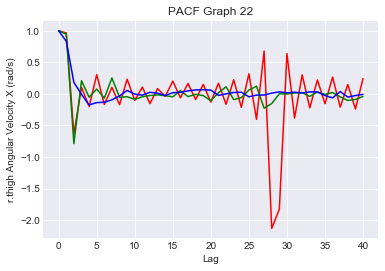

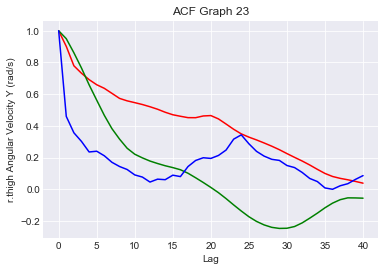

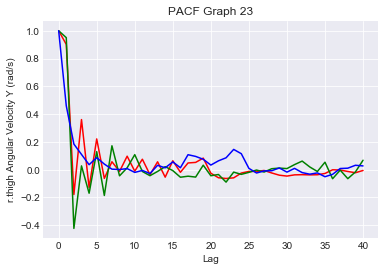

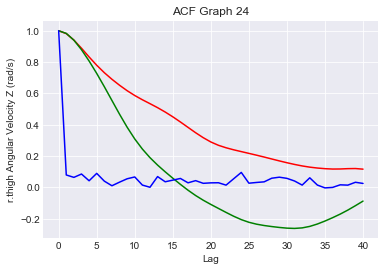

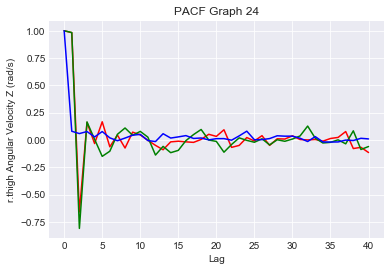

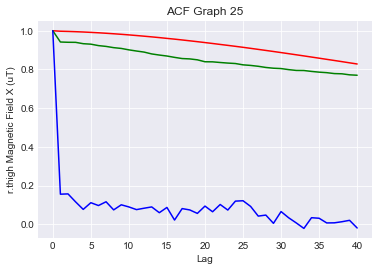

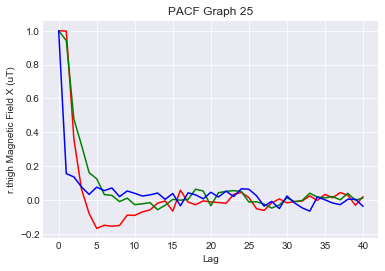

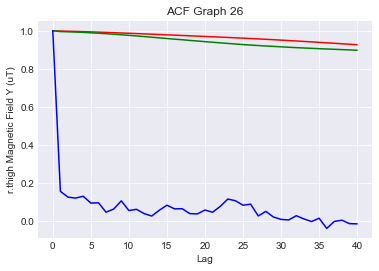

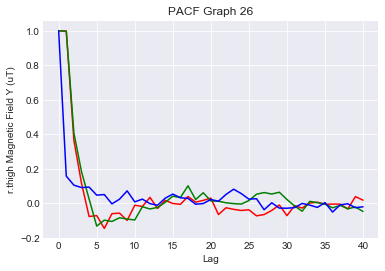

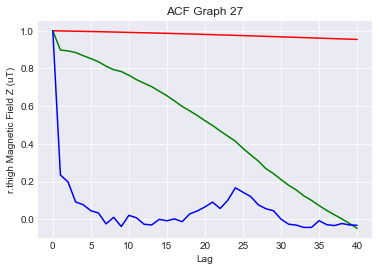

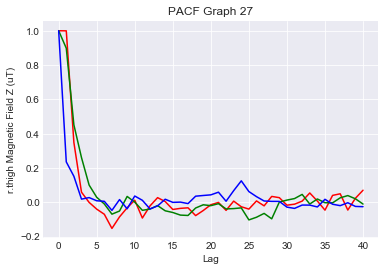

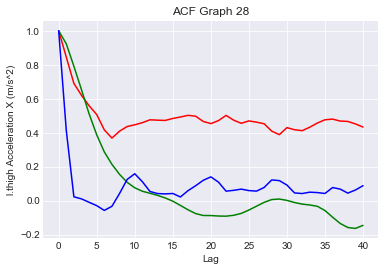

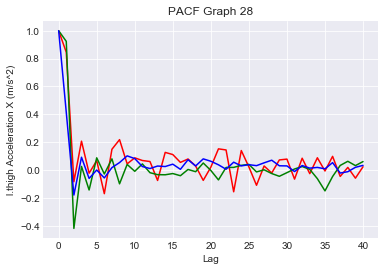

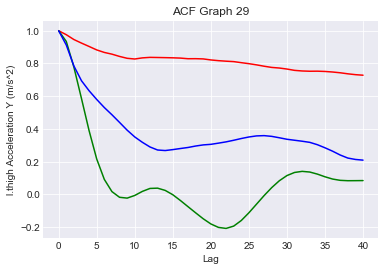

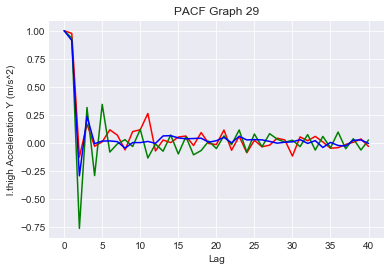

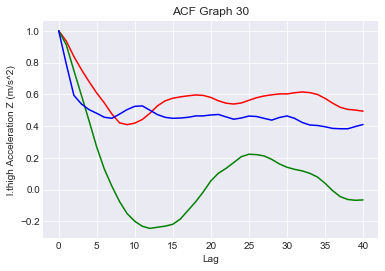

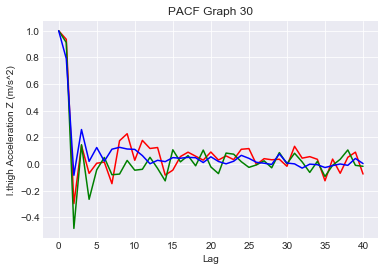

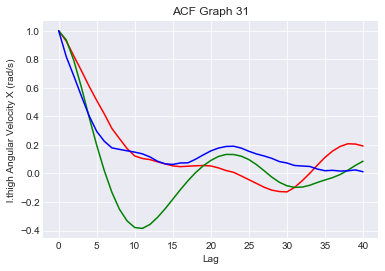

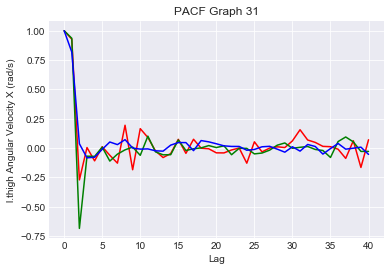

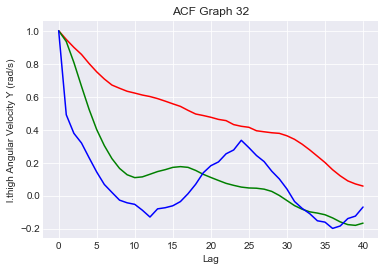

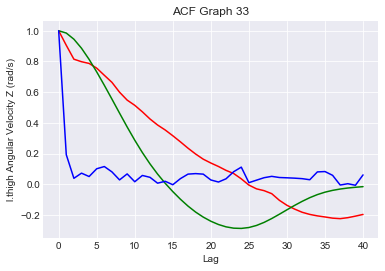

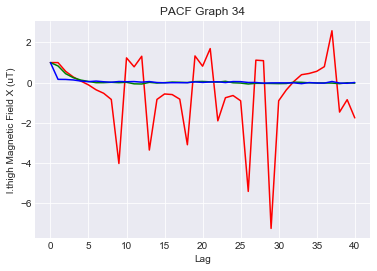

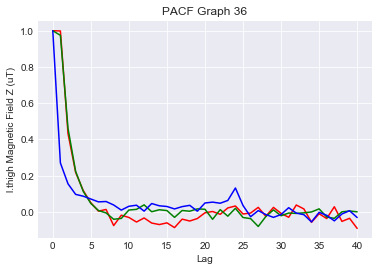

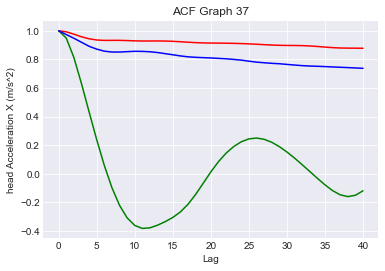

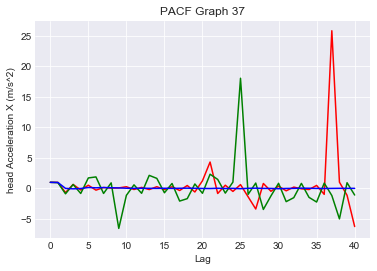

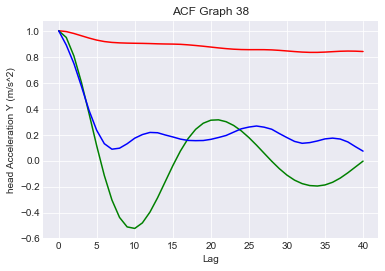

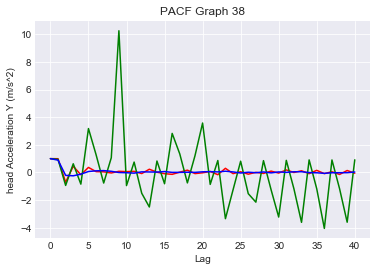

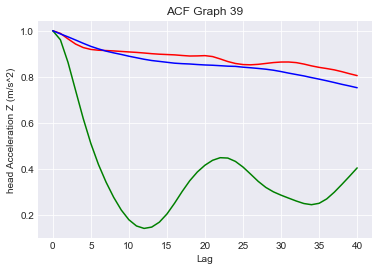

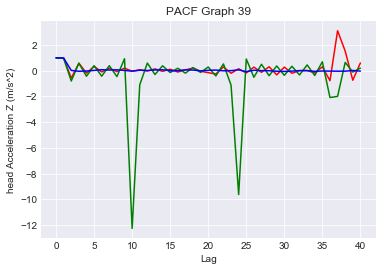

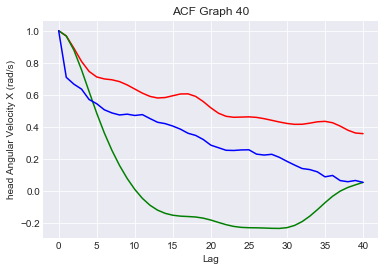

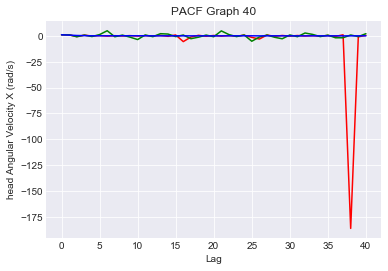

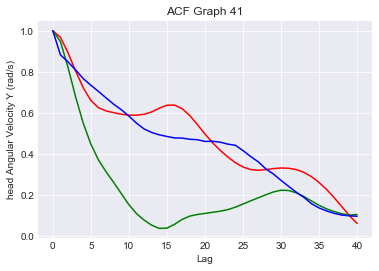

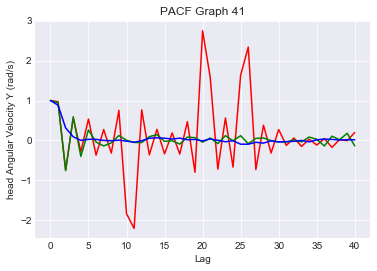

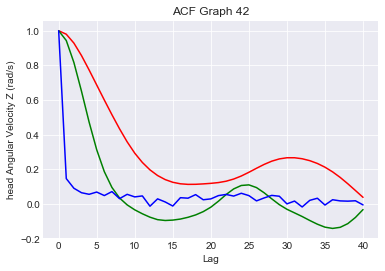

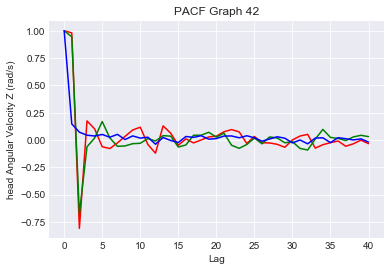

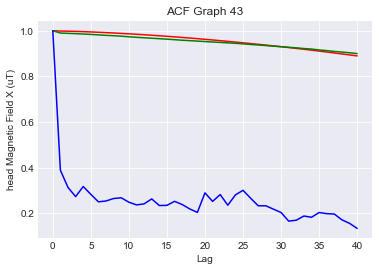

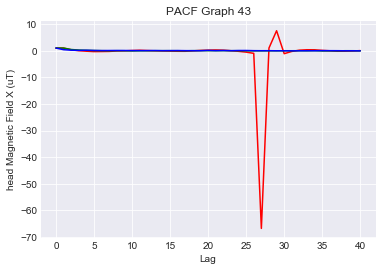

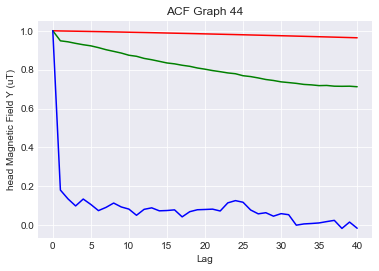

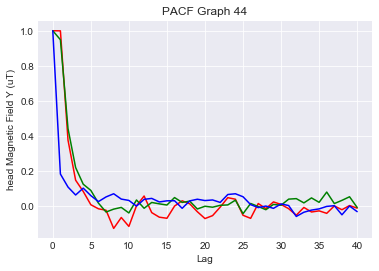

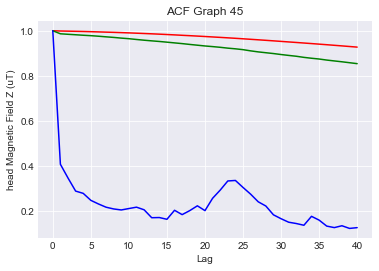

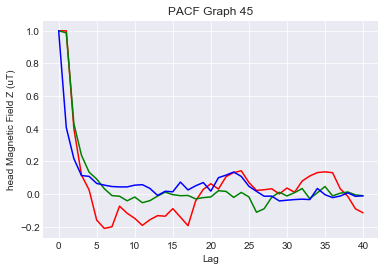

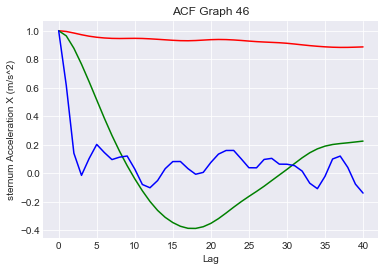

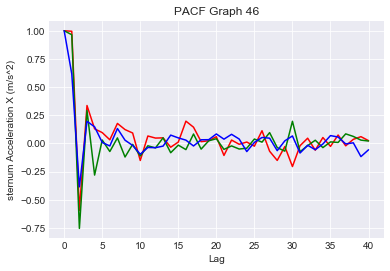

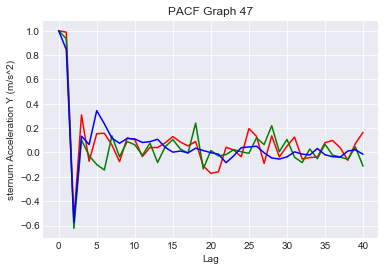

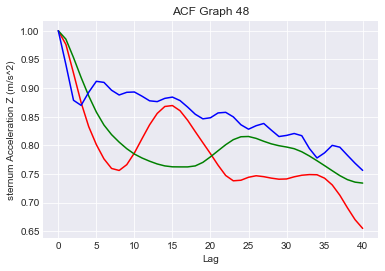

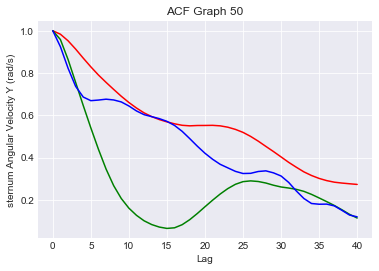

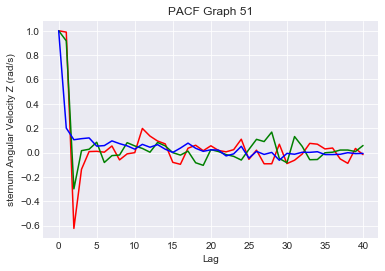

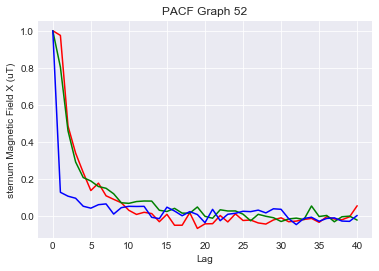

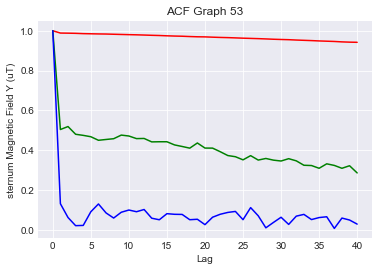

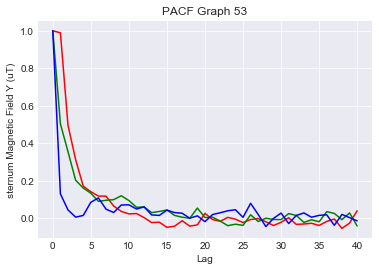

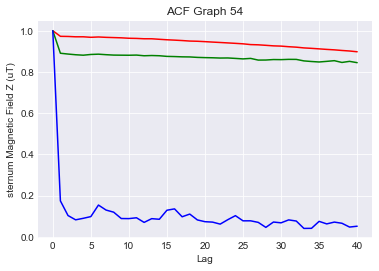

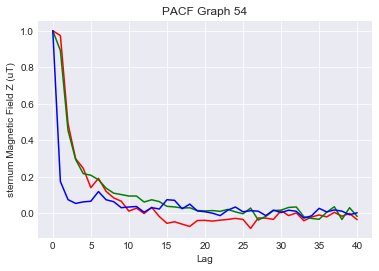

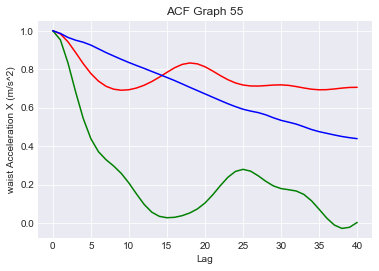

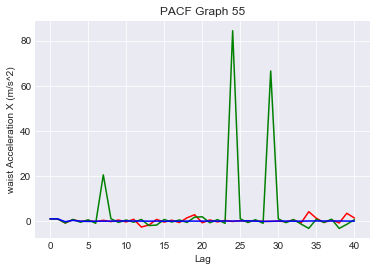

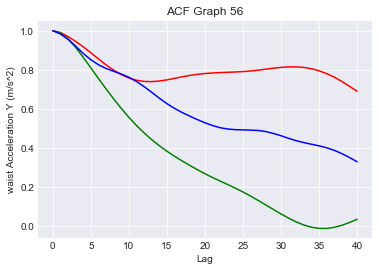

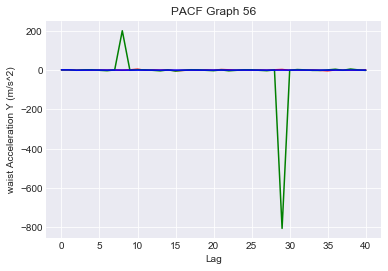

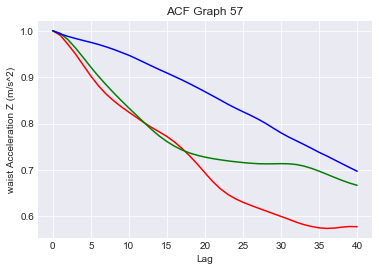

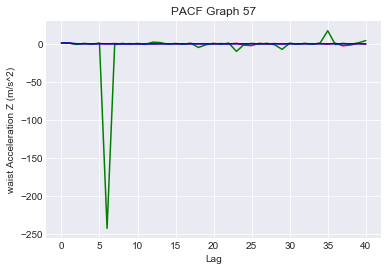

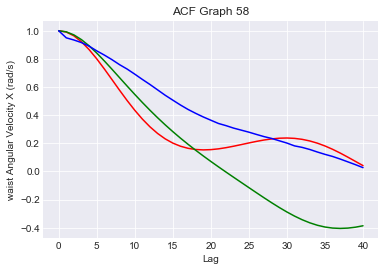

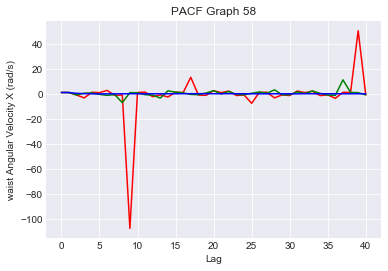

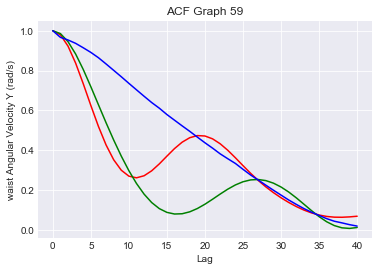

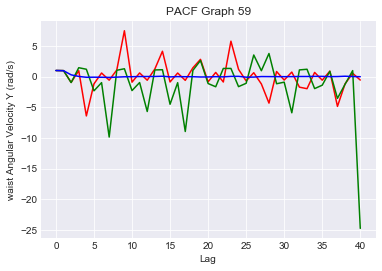

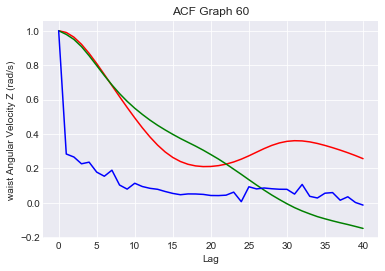

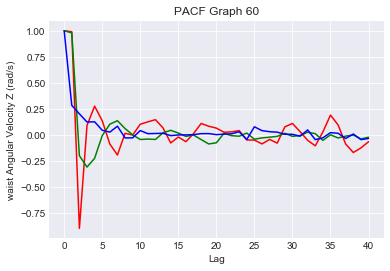

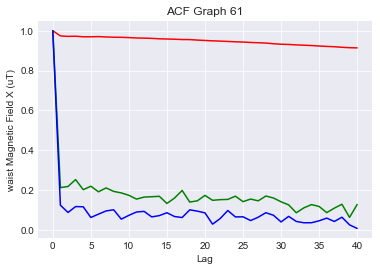

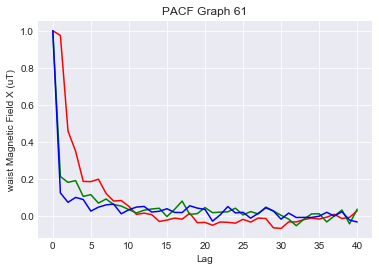

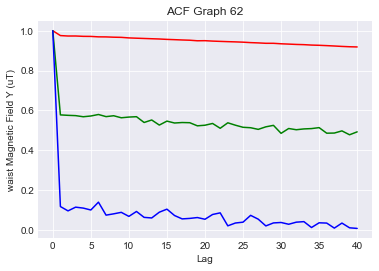

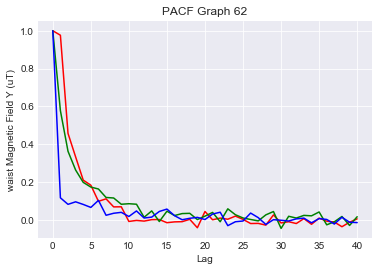

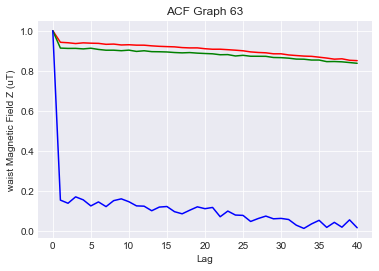

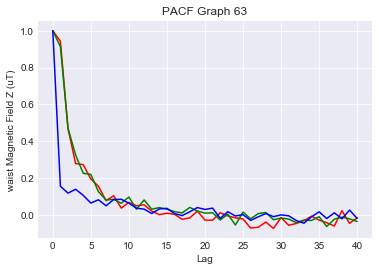

In [27]:
# (3a) acf and pacf (import all trials)

import statsmodels.tsa.stattools as st

import matplotlib.pyplot as plt

fids = df_falls.id.unique()
nfids = df_near_falls.id.unique()
aids = df_adls.id.unique()

i = 1
num_fields = len(df_falls.columns.values)-2


while i < num_fields:



    counter = 1
    for fid in fids:
        f = df_falls.loc[df_falls.id == fid]
        if counter == 1: 
            y_label_fall = f.columns.values[i]
            y_fall = f.to_numpy()[:, i:i+1].transpose()[0]
            acf_fall = st.acf(y_fall)
            pacf_fall = st.pacf(y_fall)
        else:
            y_f = f.to_numpy()[:, i:i+1].transpose()[0]
            acf_f = st.acf(y_f)
            acf_fall = acf_fall + acf_f
            pacf_f = st.pacf(y_f)
            pacf_fall = pacf_fall + pacf_f
        acf_fall = acf_fall / len(fids)
        pacf_fall = pacf_fall / len(fids)
        counter += 1

    counter = 1
    for nfid in nfids:
        nf = df_near_falls.loc[df_near_falls.id == nfid]
        if counter == 1: 
            y_near_fall = nf.to_numpy()[:, i:i+1].transpose()[0]
            acf_near_fall = st.acf(y_near_fall)
            pacf_near_fall = st.pacf(y_near_fall)
        else:
            y_nf = nf.to_numpy()[:, i:i+1].transpose()[0]
            acf_nf = st.acf(y_nf)
            acf_near_fall = acf_near_fall + acf_nf
            pacf_nf = st.pacf(y_nf)
            pacf_near_fall = pacf_near_fall + pacf_nf
        acf_near_fall = acf_near_fall / len(nfids)
        pacf_near_fall = pacf_near_fall / len(nfids)
        counter += 1


    counter = 1
    for aid in aids:
        a = df_adls.loc[df_adls.id == aid]
        if counter == 1: 
            y_adls = a.to_numpy()[:, i:i+1].transpose()[0]
            acf_adls = st.acf(y_adls)
            pacf_adls = st.pacf(y_adls)
        else:
            y_a = nf.to_numpy()[:, i:i+1].transpose()[0]
            acf_a = st.acf(y_a)
            acf_adls = acf_adls + acf_a
            pacf_a = st.pacf(y_a)
            pacf_adls = pacf_adls + pacf_a
        acf_adls = acf_adls / len(aids)
        pacf_adls = pacf_adls / len(aids)
        counter += 1


    plt.plot(acf_fall, 'r')
    plt.plot(acf_near_fall, 'g')
    plt.plot(acf_adls, 'b')
    plt.ylabel(y_label_fall)
    plt.xlabel('Lag')
    plt.title('ACF Graph ' + str(i))
    plt.grid(True)
    plt.show()


    plt.plot(pacf_fall, 'r')
    plt.plot(pacf_near_fall, 'g')
    plt.plot(pacf_adls, 'b')
    plt.ylabel(y_label_fall)
    plt.xlabel('Lag')
    plt.title('PACF Graph ' + str(i))
    plt.grid(True)
    plt.show()
    
    i += 1

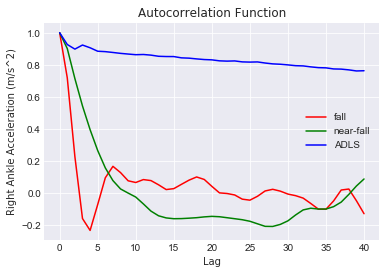

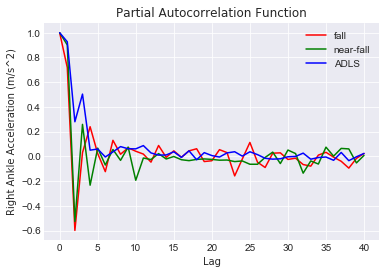

In [41]:
# (3b) acf and pacf for poster (import only 1 trial)

import statsmodels.tsa.stattools as st

import matplotlib.pyplot as plt

fids = df_falls.id.unique()
nfids = df_near_falls.id.unique()
aids = df_adls.id.unique()

i = 2
num_fields = len(df_falls.columns.values)-2

counter = 1
for fid in fids:
    f = df_falls.loc[df_falls.id == fid]
    if counter == 1: 
        y_label_fall = f.columns.values[i]
        y_fall = f.to_numpy()[:, i:i+1].transpose()[0]
        acf_fall = st.acf(y_fall)
        pacf_fall = st.pacf(y_fall)
    else:
        y_f = f.to_numpy()[:, i:i+1].transpose()[0]
        acf_f = st.acf(y_f)
        acf_fall = acf_fall + acf_f
        pacf_f = st.pacf(y_f)
        pacf_fall = pacf_fall + pacf_f
    acf_fall = acf_fall / len(fids)
    pacf_fall = pacf_fall / len(fids)
    counter += 1

counter = 1
for nfid in nfids:
    nf = df_near_falls.loc[df_near_falls.id == nfid]
    if counter == 1: 
        y_near_fall = nf.to_numpy()[:, i:i+1].transpose()[0]
        acf_near_fall = st.acf(y_near_fall)
        pacf_near_fall = st.pacf(y_near_fall)
    else:
        y_nf = nf.to_numpy()[:, i:i+1].transpose()[0]
        acf_nf = st.acf(y_nf)
        acf_near_fall = acf_near_fall + acf_nf
        pacf_nf = st.pacf(y_nf)
        pacf_near_fall = pacf_near_fall + pacf_nf
    acf_near_fall = acf_near_fall / len(nfids)
    pacf_near_fall = pacf_near_fall / len(nfids)
    counter += 1


counter = 1
for aid in aids:
    a = df_adls.loc[df_adls.id == aid]
    if counter == 1: 
        y_adls = a.to_numpy()[:, i:i+1].transpose()[0]
        acf_adls = st.acf(y_adls)
        pacf_adls = st.pacf(y_adls)
    else:
        y_a = nf.to_numpy()[:, i:i+1].transpose()[0]
        acf_a = st.acf(y_a)
        acf_adls = acf_adls + acf_a
        pacf_a = st.pacf(y_a)
        pacf_adls = pacf_adls + pacf_a
    acf_adls = acf_adls / len(aids)
    pacf_adls = pacf_adls / len(aids)
    counter += 1

title_font = {'family' : 'normal',
        'size'   : 12}

font = {'family' : 'normal',
        'size'   : 10}
    
plt.plot(acf_fall, 'r', label='fall')
plt.plot(acf_near_fall, 'g', label='near-fall')
plt.plot(acf_adls, 'b', label='ADLS')
plt.ylabel('Right Ankle Acceleration (m/s^2)', **font)
plt.xlabel('Lag', **font)
plt.title('Autocorrelation Function', **title_font)
plt.legend()
plt.grid(True)
plt.style.use('seaborn-darkgrid')
plt.savefig('acf.png')
plt.show()


plt.plot(pacf_fall, 'r', label='fall')
plt.plot(pacf_near_fall, 'g', label='near-fall')
plt.plot(pacf_adls, 'b', label='ADLS')
plt.ylabel('Right Ankle Acceleration (m/s^2)', **font)
plt.xlabel('Lag', **font)
plt.title('Partial Autocorrelation Function', **title_font)
plt.legend()
plt.grid(True)
plt.style.use('seaborn-darkgrid')
plt.savefig('pacf.png')
plt.show()


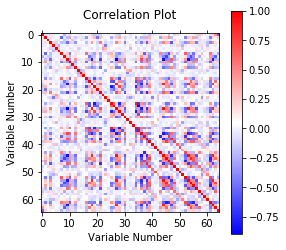

In [28]:
# (4) Correlation Table (import all trials)

%matplotlib inline
import matplotlib.pyplot as plt

plt.matshow(df_data.corr(), cmap='bwr')
plt.colorbar()
plt.tick_params(labelbottom='on',labeltop='off')
plt.title('Correlation Plot')
plt.xlabel('Variable Number')
plt.ylabel('Variable Number')
plt.savefig('corr.png')